# OpenWeatherMap API 開発

In [1]:
from dotenv import load_dotenv
import os, requests, time
from datetime import datetime
from pathlib import Path
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import japanize_matplotlib

## API Keyを取得

In [2]:
# API Keyを.envファイルから取得
env_path = Path("..") / ".env"
load_dotenv(dotenv_path=env_path)

api_key = os.getenv("OPENWEATHER_API_KEY")

## 天気データを取得するAPIのリクエストを実行

In [3]:
# 都市名
city = "Tokyo"

# APIエンドポイントとパラメータ
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=ja"

# APIリクエストを送信
response = requests.get(url)

# JSON形式で結果を受け取る
data = response.json()

In [4]:
# 確認
pprint(data)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.6895, 'lon': 139.6917},
 'dt': 1747961695,
 'id': 1850144,
 'main': {'feels_like': 19.39,
          'grnd_level': 1012,
          'humidity': 60,
          'pressure': 1013,
          'sea_level': 1013,
          'temp': 19.79,
          'temp_max': 20.7,
          'temp_min': 18.21},
 'name': '東京都',
 'sys': {'country': 'JP',
         'id': 268395,
         'sunrise': 1747942267,
         'sunset': 1747993506,
         'type': 2},
 'timezone': 32400,
 'visibility': 10000,
 'weather': [{'description': '曇りがち',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 30, 'speed': 6.69}}


## 複数の都市を対象にデータを取得し、表形式でまとめる

In [5]:
# 対象都市のリストを作成
target_cities = ["Tokyo", "Osaka", "Nagoya", "Sapporo", "Kyoto", "Fukuoka", "Yokohama",
                "Sendai", "Chiba", "Maebashi", "Shizuoka", "Naha"]

#実行日の日付の文字列を取得
today = datetime.today()
today_formatted = today.strftime("%Y/%m/%d")

In [6]:
# 空のリスト作成
weather_data = []

for city in target_cities:
    # APIエンドポイントとパラメータ
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric&lang=ja"
    
    # APIリクエストを送信
    response = requests.get(url)
    
    # JSON形式で結果を受け取る
    data = response.json()
    
    # 各項目を辞書にまとめて、リストに追加していく
    weather_data.append({
        "日付" : today_formatted,
        "都市名" : data["name"],
        "天気" : data["weather"][0]["description"],
        "気温(℃)" : data["main"]["temp"],
        "湿度(%)" : data["main"]["humidity"],
        "風速(m/s)" : data["wind"]["speed"],
        "体感温度(℃)" : data["main"]["feels_like"],
        "最低気温(℃)" : data["main"]["temp_min"],
        "最高気温(℃)" : data["main"]["temp_max"]
    })
    # アクセスごとの間隔を開ける
    time.sleep(1)

In [7]:
# 辞書のリストからpandasのDataFrameを作成
df = pd.DataFrame(weather_data)
# 確認
df.head()

,日付,都市名,天気,気温(℃),湿度(%),風速(m/s),体感温度(℃),最低気温(℃),最高気温(℃)
0,2025/05/23,東京都,曇りがち,19.79,60,6.69,19.39,18.21,20.70
1,2025/05/23,大阪市,晴天,21.56,51,5.14,21.10,20.90,21.96
2,2025/05/23,名古屋市,厚い雲,23.31,53,0.45,23.08,23.31,23.34
3,2025/05/23,札幌市,曇りがち,11.02,80,3.60,10.27,10.86,12.20
4,2025/05/23,京都市,雲,22.82,42,2.74,22.25,22.82,22.82


In [8]:
today_for_filename = today.strftime("%Y%m%d")

# 日付付ファイル名でcsv出力
df.to_csv(f"../output/weather_{today_for_filename}.csv", index=False, encoding="utf-8-sig")

## グラフによる可視化・画像の保存

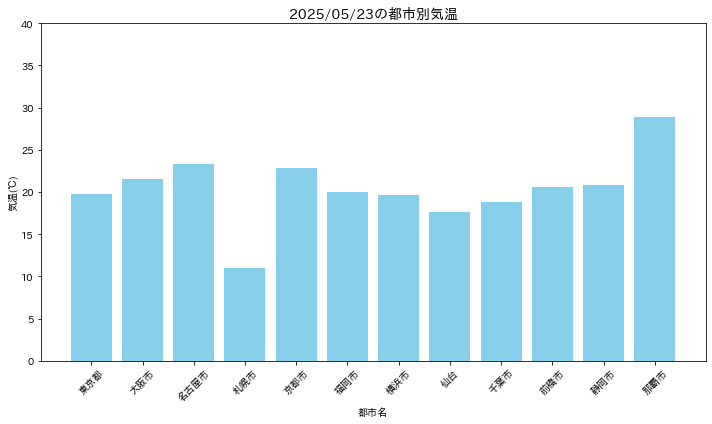

In [9]:
# グラフ描画
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")

# 棒グラフの描画
ax.bar(df["都市名"], df["気温(℃)"], color='skyblue')

# グラフタイトル・ラベルなどの設定
ax.set_title(f"{today_formatted}の都市別気温", fontsize=14)
ax.set_xlabel("都市名")
ax.set_ylabel("気温(℃)")
ax.tick_params(axis='x', rotation=45)

# y軸スケールを固定
ax.set_ylim(0, 40)

# レイアウト調整・保存・出力
fig.tight_layout()
plt.savefig(f"../output/weather_{today_for_filename}.png", dpi=300, bbox_inches="tight")
plt.show()